<h1 style='color: black'>Задание №3. Решение алгебр. уравнений 3й степени</h1>

Должны привести уравнение к виду:
$$x^3 + a\cdot x^2 + b\cdot x + c = 0$$
Сделать замену:
$x = z - \frac{a}{3}$
Получим:
$$z^3 + p\cdot z + q = 0$$
Вычисляем:
$$u = \left(-\frac{q}{2} + \left(\frac{q^2}{4} + \frac{p^3}{27}\right)^{1/2}\right)^{1/3}$$
$$v = \left(-\frac{q}{2} - \left(\frac{q^2}{4} + \frac{p^3}{27}\right)^{1/2}\right)^{1/3}$$

Берем u1 (где u1 -  какое-то значение u)<br>
v1 вычисляем из $3\cdot u\cdot v + p = 0$<br>
Вычисляем $\varepsilon = -1/2 + i\cdot\frac{\sqrt{3}}{2}$
<br><br>
Корни z:<br>
$z1 = u1 + v1$<br>
$z2 = u1\cdot \varepsilon + v1\cdot \varepsilon^2$<br>
$z3 = v1\cdot \varepsilon + u1\cdot \varepsilon^2$<br>
<br><br>
И далее возвращаемся к замене $x = z - \frac{a}{3}$


x^3 - 1/2*x^2 + 7/4*x - 3/4

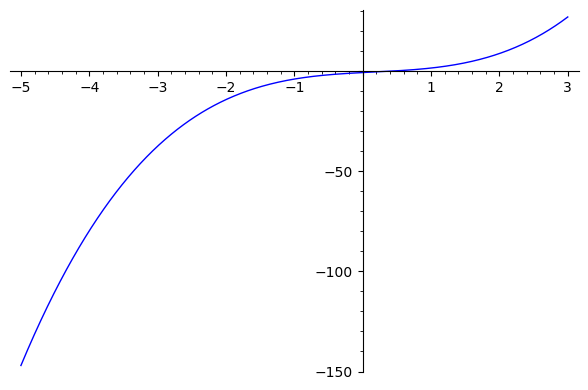

In [2]:
poly_x = 4*x**3 - 2*x**2 +7*x - 3
poly_x /= poly_x.coefficient(x, 3)
show(poly_x)
plot(poly_x, (x, -5, 3))

Сделаем замену x = z - a/3

<h1 style="color: red">Внимание!</h1>
$a$ - это коэф. при $x^2$, не при $x$<br>

In [3]:
poly_x

x^3 - 1/2*x^2 + 7/4*x - 3/4

In [4]:
a = poly_x.coefficient(x, 2)
show("a = ", a)
var("z")
poly_z = poly_x(x = z -(a/3))

'a = ' -1/2

In [5]:
poly_z = poly_z.expand().simplify()
show(poly_z)

z^3 + 5/3*z - 101/216

In [6]:
poly_z /= poly_z.coefficient(z, 3)
show(poly_z)

z^3 + 5/3*z - 101/216

$z^3 + p\cdot z + q = 0$<br>
Отсюда:<br>

In [55]:
pq = {'p': poly_z.coefficient(z, 1), 'q': poly_z.coefficient(z, 0)}
show(pq)

{'p': 5/3, 'q': -101/216}

Вычисляем:
$$u = \left(-\frac{q}{2} + \left(\frac{q^2}{4} + \frac{p^3}{27}\right)^{1/2}\right)^{1/3}$$
$$v = \left(-\frac{q}{2} - \left(\frac{q^2}{4} + \frac{p^3}{27}\right)^{1/2}\right)^{1/3}$$

In [56]:
def safe_cubic_root(_in_param):
    if _in_param.imag():
        # sgn для комплексного числа выдаст ошибку в дальнейшем, когда будет вызван numerical_approx
        # поэтому придется просто возводить в степень
        return (_in_param)**(1/3)
    else:
        return sgn(_in_param)*(abs(_in_param)**(1/3))

In [57]:
var("p q da")
# da - выносим отдельно и объявляем _после_ формул "u" и "v"
# потому как так отлаживать удобнее
u_pre = -q/2 + sqrt(da)
v_pre = -q/2 - sqrt(da)
da = q**2/4 + p**3/27

In [58]:
show(da)

1/27*p^3 + 1/4*q^2

In [59]:
show(da(**pq))

521/2304

Берем u1 (где u1 -  какое-то значение u)<br>

In [60]:
show("da = ", da(**pq))
u1 = safe_cubic_root(u_pre(**pq, da=da(**pq)))
show("u1 = ", u1.n(digits=4))

'da = ' 521/2304

'u1 = ' 0.8918

In [61]:
u1_2 = safe_cubic_root(u_pre(**pq, da=da(**pq)))

show("u1_2 = ", u1_2.n(digits=4))

'u1_2 = ' 0.8918

v1 вычисляем из $3\cdot u\cdot v + p = 0$<br>

In [62]:
v1=safe_cubic_root(v_pre(**pq, da=da(**pq)))
show(v1)
show(v1.n(digits=4))

-abs(-1/48*sqrt(521) + 101/432)^(1/3)

-0.6229

In [63]:
v1_2 = v_pre(**pq, da=da(**pq))**(1/3)
show(v1_2.n(digits=4))

0.3115 + 0.5395*I

In [64]:
def v1_func(_p, _u):
    return -_p/(3*_u)


v1 = v1_func(_p=pq['p'], _u=u1_2)
show(v1)
show(v1.n(digits=4))

-20/3*(1/2)^(2/3)/(9*sqrt(521) + 101)^(1/3)

-0.6229

Вычисляем $\varepsilon = -1/2 + i\cdot\frac{\sqrt{3}}{2}$

In [65]:
Eps = -1/2 + (sqrt(-3))/2
show(Eps)

1/2*sqrt(-3) - 1/2

Корни z:<br>
$z1 = u1 + v1$<br>
$z2 = u1\cdot \varepsilon + v1\cdot \varepsilon^2$<br>
$z3 = v1\cdot \varepsilon + u1\cdot \varepsilon^2$<br>

In [66]:
z = [u1 + v1
     , u1*Eps + v1*Eps**2
     , v1*Eps + u1*Eps**2
    ]

for i, zi in enumerate(z):
    show(f"z{i} = ", zi.simplify())

for i, zi in enumerate(z):
    show(f"z{i} = ", zi.n(digits=4))

'z0 = ' 1/12*2^(2/3)*(9*sqrt(521) + 101)^(1/3) - 10/3*2^(1/3)/(9*sqrt(521) + 101)^(1/3)

'z1 = ' 1/24*2^(2/3)*(9*sqrt(521) + 101)^(1/3)*(I*sqrt(3) - 1) - 5/6*2^(1/3)*(I*sqrt(3) - 1)^2/(9*sqrt(521) + 101)^(1/3)

'z2 = ' 1/48*2^(2/3)*(9*sqrt(521) + 101)^(1/3)*(I*sqrt(3) - 1)^2 - 5/3*2^(1/3)*(I*sqrt(3) - 1)/(9*sqrt(521) + 101)^(1/3)

'z0 = ' 0.2689

'z1 = ' -0.1344 + 1.312*I

'z2 = ' -0.1344 - 1.312*I

Теперь ищем D, чтобы сверить, какие корни получились, какие должны быть и пр.:<br>
D < 0: 1 действительный, два комплексных корня<br>
D == 0: три действительных корня, два из них равные<br>
D > 0 - три действительных и различных

In [67]:
D = -4*p**3 - 27*q**2

In [68]:
D(**pq)

-1563/64

Вернемся к подстановке: x = z - a/3

In [69]:
a = poly_x.coefficient(x, 2)


def from_z_to_x(_z, _a):
    return _z - _a/3


for i, zi in enumerate(z):
    xi = from_z_to_x(_z=zi, _a=a)
    show(f"x{i} = ", xi.n(digits=4))

'x0 = ' 0.4355

'x1 = ' 0.03222 + 1.312*I

'x2 = ' 0.03223 - 1.312*I

In [70]:
var("x")
sols = solve(poly_x(), x)
for i, sol in enumerate(sols):
    show(f"x{i} = ", sol.rhs().n(digits=4))

'x0 = ' 0.03223 - 1.312*I

'x1 = ' 0.03222 + 1.312*I

'x2 = ' 0.4355